# Spaceship Titanic from Kaggle

#### Dataset description (from Kaggle)


In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.



#### File and Data Field Descriptions

-  __train.csv__ - Personal records for about two-thirds (approx 8700) of the passengers, to be used as training data.


    - _PassengerId_ - A unique Id for each passenger. Each Id takes the form _gggg_pp_ where _gggg_ indicates a group the passenger is travelling with and _pp_ is their number within the group. People in a group are often family members, but not always.

    - _HomePlanet_ - The planet the passenger departed from, typically their planet of permanent residence.

    - _CryoSleep_ - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

    - _Cabin_ - The cabin number where the passenger is staying. Takes the form _deck/num/side_, where side can be either _P_ for Port or _S_ for Starboard.

    - _Destination_ - The planet the passenger will be debarking to.

    - _Age_ - The age of the passenger.

    - _VIP_ - Whether the passenger has paid for special VIP service during the voyage.

    - _RoomService_, _FoodCourt_, _ShoppingMall_, _Spa_, _VRDeck_ - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

    - _Name_ - The first and last names of the passenger.

    - _Transported_ - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.


- __test.csv__ - Personal records for the remaining one-third (approx 4300) of the passengers, to be used as test data. Your task is to predict the value of _Transported_ for the passengers in this set.

- __sample_submission.csv__ - A submission file in the correct format.

    - _PassengerId_ - Id for each passenger in the test set.


    - _Transported_ - The target. For each passenger, predict either _True_ or _False_.

## Loading the data and other imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv("../Data/train.csv")
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


## 1. Exploratory Data Analysis

#### Transported

<Axes: xlabel='Transported', ylabel='count'>

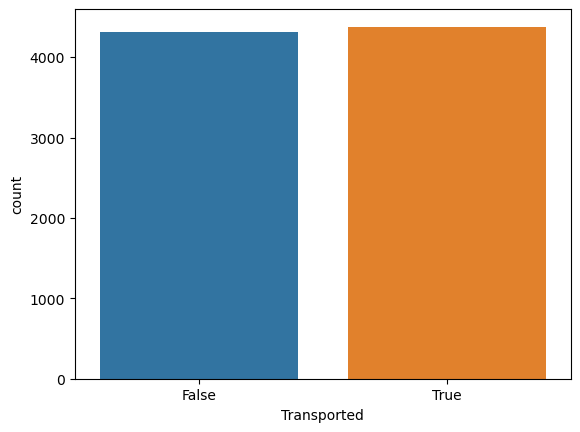

In [4]:
sns.countplot(data=df_train, x='Transported')

Approximately same number of transported than not transported

#### HomePlanet

<Axes: xlabel='HomePlanet', ylabel='count'>

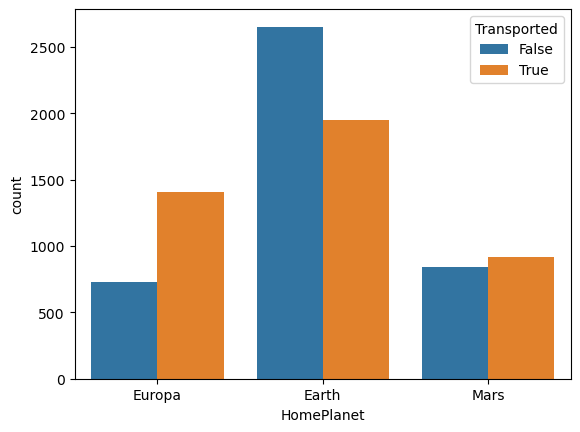

In [5]:
sns.countplot(data=df_train, x='HomePlanet', hue=df_train['Transported'].astype(str))

#### Destination

<Axes: xlabel='Destination', ylabel='count'>

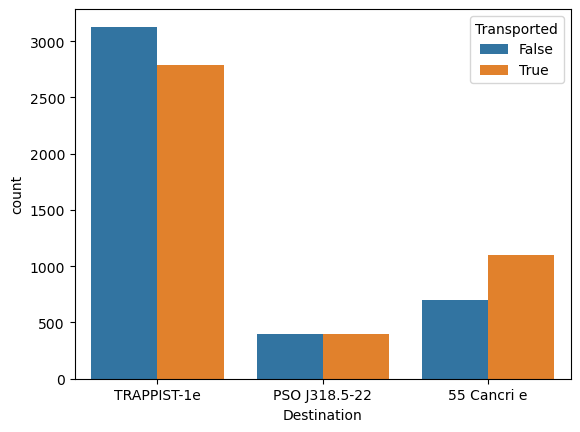

In [6]:
sns.countplot(data=df_train, x='Destination', hue=df_train['Transported'].astype(str))

#### Age

In [7]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<Axes: xlabel='Age', ylabel='Count'>

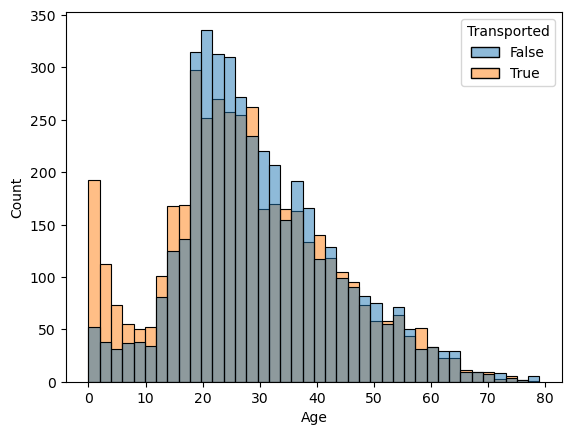

In [8]:
sns.histplot(data=df_train, x='Age', bins=40, hue='Transported')

#### VIP

In [9]:
df_train['VIP'].value_counts(normalize=True)

VIP
False    0.976561
True     0.023439
Name: proportion, dtype: float64

<Axes: xlabel='VIP', ylabel='count'>

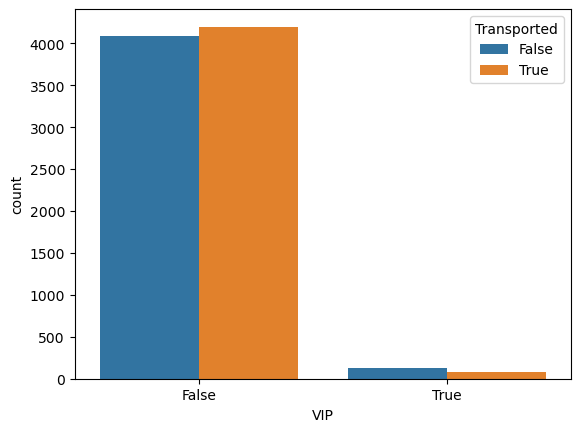

In [10]:
sns.countplot(data=df_train, x='VIP', hue=df_train['Transported'].astype(str))

In [11]:
df_train.groupby('VIP')['Transported'].value_counts(normalize=True)

VIP    Transported
False  True           0.506332
       False          0.493668
True   False          0.618090
       True           0.381910
Name: proportion, dtype: float64

### CryoSleep

<Axes: xlabel='CryoSleep', ylabel='count'>

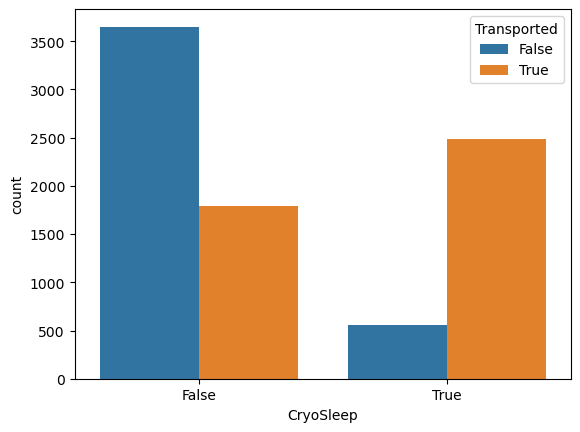

In [12]:
sns.countplot(data=df_train, x='CryoSleep', hue=df_train['Transported'].astype(str))

<Axes: xlabel='Age', ylabel='Count'>

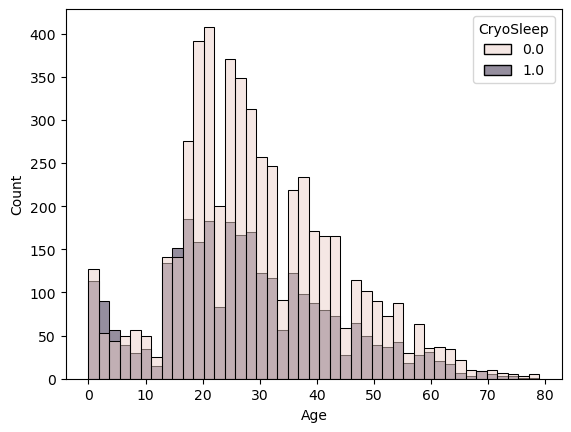

In [13]:
sns.histplot(data=df_train, x='Age', hue='CryoSleep')

#### Expenses

<Axes: xlabel='FoodCourt', ylabel='Spa'>

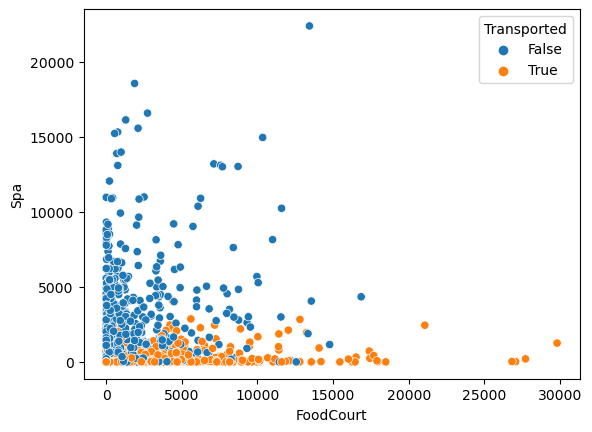

In [14]:
sns.scatterplot(data=df_train, x='FoodCourt', y='Spa', hue='Transported')

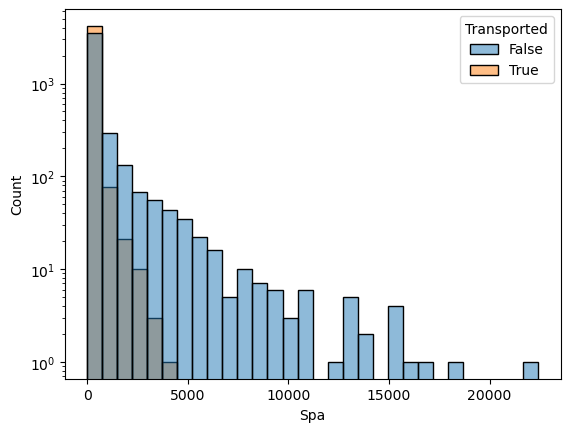

In [15]:
sns.histplot(data=df_train, x='Spa', hue='Transported', bins=30)
plt.yscale('log')

Nobody spending over 5000 in the Spa was trasported!

Text(0, 0.5, 'Total Spent')

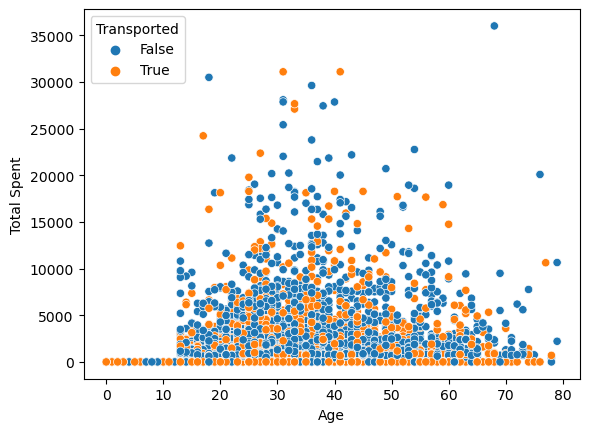

In [16]:
total_spent = (
    df_train['Spa'] 
    + df_train['FoodCourt'] 
    + df_train['VRDeck'] 
    + df_train['ShoppingMall'] 
    + df_train['RoomService']
)
 
sns.scatterplot(data=df_train, x='Age', y=total_spent, hue='Transported')
plt.ylabel('Total Spent')

No visible relation with total amount spent

#### Correlations

In [17]:
corr = df_train.select_dtypes(include='number').corr()
corr

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000


<Axes: >

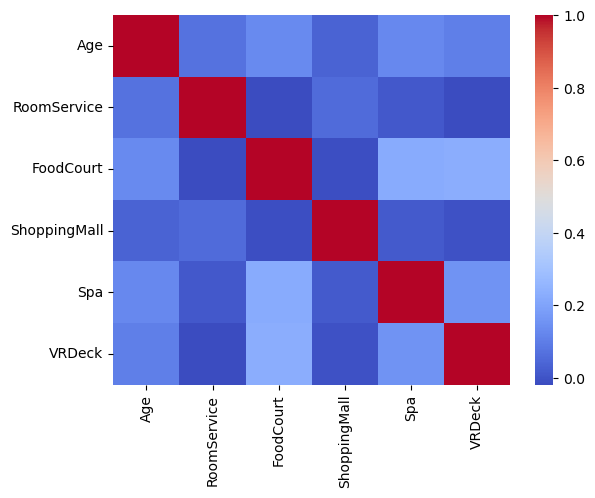

In [18]:
sns.heatmap(corr, cmap='coolwarm')

## 2. Data Preprocessing:

We want to apply the same data preprocessing to the train and test set, so we load the test set, add a new column to track the source, and fill the transported column in the test set as np.nan. We concatenate both datasets

In [20]:
df_test = pd.read_csv("../Data/test.csv")

In [21]:
df_train['source'] = 'train'
df_test['source'] = 'test'
df_test['Transported'] = np.nan

In [22]:
df = pd.concat([df_train, df_test], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
 14  source        12970 non-null  object 
dtypes: float64(6), object(9)
memory usage: 1.5+ MB


### Missing data and feature engineering

In [23]:
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
Name             294
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
PassengerId        0
source             0
dtype: int64


<Axes: >

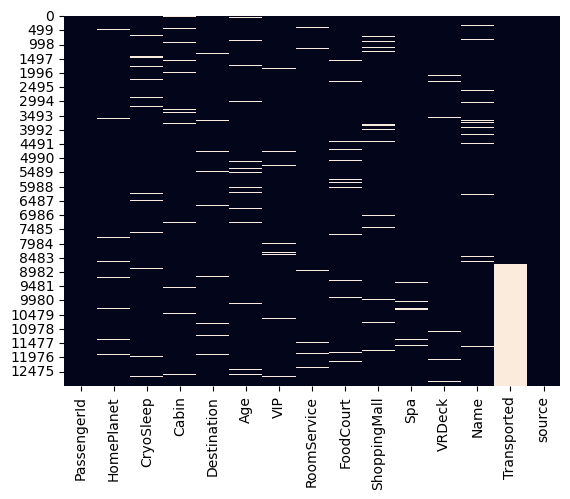

In [24]:
sns.heatmap(df.isnull(), cbar=False)

I set the missing values in the spending columns to 0 (many people actually also spent 0):

In [25]:
spend_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
df[spend_cols] = df[spend_cols].fillna(0)

df['TotalSpent'] = df[spend_cols].sum(axis=1)

I set the missing values in VIP and CryoSleep variables to False (most common case)

In [26]:
df['CryoSleep'] = df['CryoSleep'].fillna(False)
df['VIP'] = df['VIP'].fillna(False)

I set the missing values in Age to the median age:

In [27]:
df['Age'] = df['Age'].fillna(df['Age'].median())

As HomePlanet and Destination are cathegorical columns with few cathegories, I set the missing values to 'Unknown':

In [28]:
df['HomePlanet'] = df['HomePlanet'].fillna('Unknown')
df['Destination'] = df['Destination'].fillna('Unknown')

The Name column probably does not add any relevant information, so we can drop it:

In [29]:
df.drop('Name', axis=1, inplace=True)

Finally, The Cabin column is a cathegorical column which has the structure deck/num/side. We want to divide this information into three columns, and we fill the missing data with:

Deck: 'Unknown'

CabinNumber: -1

Side: 'U'

In [30]:
# Create new empty columns
df['Deck'] = None
df['CabinNumber'] = None
df['Side'] = None

# Split the non missing columns
cabin_split = df['Cabin'].dropna().str.split('/', expand=True)
df.loc[cabin_split.index, 'Deck'] = cabin_split[0]
df.loc[cabin_split.index, 'CabinNumber'] = pd.to_numeric(cabin_split[1], errors='coerce')
df.loc[cabin_split.index, 'Side'] = cabin_split[2]

# Drop the original column
df.drop('Cabin', axis=1, inplace=True)

# Fill the missing values:
df['Deck'] = df['Deck'].fillna('Unknown')
df['Side'] = df['Side'].fillna('U')
df['CabinNumber'] = df['CabinNumber'].fillna(-1)

We don't have any more missing values:

<Axes: >

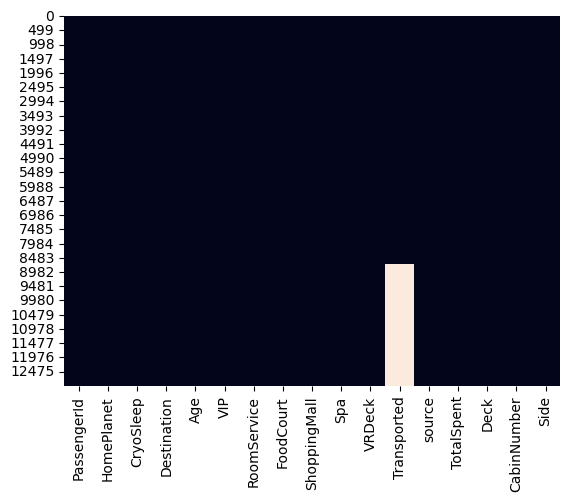

In [31]:
sns.heatmap(df.isnull(), cbar=False)

Let us explore the new variables:

<Axes: xlabel='Side', ylabel='count'>

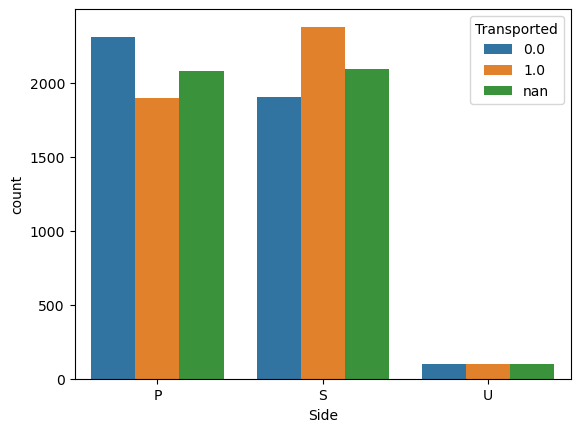

In [32]:
sns.countplot(data=df, x='Side', hue=df['Transported'].astype(str))

<Axes: xlabel='Deck', ylabel='count'>

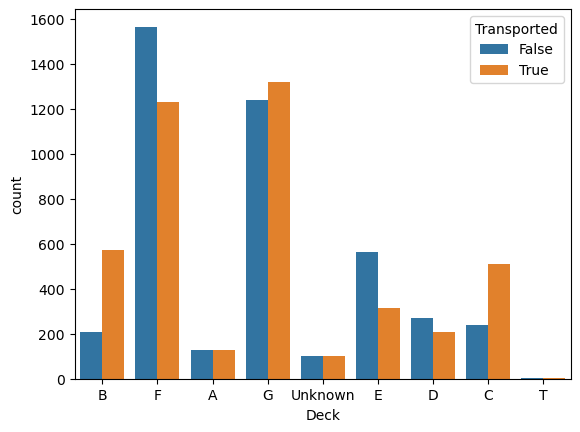

In [29]:
sns.countplot(data=df, x='Deck', hue=df['Transported'].astype(str))

<Axes: xlabel='CabinNumber', ylabel='Count'>

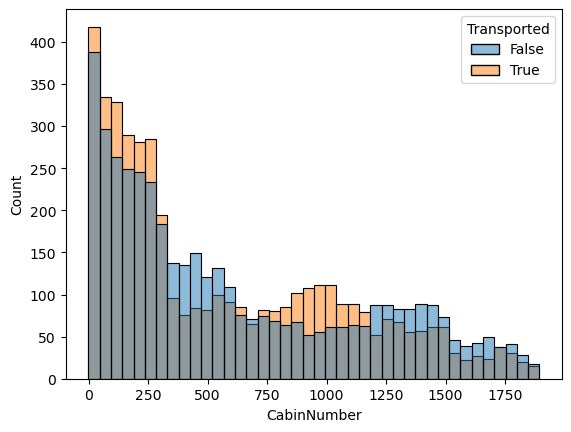

In [30]:
sns.histplot(data=df, x='CabinNumber', bins=40, hue='Transported')

We create a column indicating group size and a column to indicate that the passenger is travelling alone:

In [31]:
# We take the group out of PassengerId: 
df['Group'] = df['PassengerId'].str.split('_').str[0]

# We add a group size column:
group_sizes = df['Group'].value_counts()
df['GroupSize'] = df['Group'].map(group_sizes)

# We further create a cathegorical column that indicates if a passenger is travelling alone:
df['IsAlone'] = df['GroupSize'] == 1

We notice that the people in the same group will probably come from the same HomePlanet, so we fill the 'Unknown' values with those of the people in the same group:

In [32]:
def FillHomePlanet(row, group_planet_map):
    if row['HomePlanet'] == 'Unknown' and not row['IsAlone']:
        group = row['Group']
        return group_planet_map.get(group, 'Unknown')  # Tries to find the Planet for that group in the dictionary, 
                                                       # and if it is not there, it returns 'Unknown'
    else:
        return row['HomePlanet']                       # If not Unknown or alone, changes nothing

In [33]:
# Create a dictionary of the most common Home Planet per group:
group_planet_map = (df[df['HomePlanet'] != 'Unknown'] # Filters only the known values
                    .groupby('Group')['HomePlanet']   # Groups by group and grabs the 
                    .agg(lambda x: x.mode().iloc[0])  # Takes the most common value
                    .to_dict()                        # Creates a dictionary out of it
                    )


In [34]:
df['HomePlanet'] = df.apply(lambda row: FillHomePlanet(row, group_planet_map), axis=1)

Finally we drop the PassengerId and Group columns:

In [35]:
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Group', axis=1, inplace=True)

### Categorical variables into usable format

In [36]:
def create_dummies_and_drop(col_name, dataframe):
    dumcols = pd.get_dummies(dataframe[col_name], prefix=col_name, drop_first=True).astype('int')
    dataframe_new = dataframe.join(dumcols)
    dataframe_new.drop(col_name, axis=1, inplace=True)
    return dataframe_new

In [37]:
obj_cols =  ['HomePlanet', 'Destination', 'Deck', 'Side'] 

for col in obj_cols:
    df = create_dummies_and_drop(col, df)

In [40]:
df['CryoSleep'] = df['CryoSleep'].astype(int)  
df['VIP'] = df['VIP'].astype(int)  
df['IsAlone'] = df['IsAlone'].astype(int)  

## 3. Modeling and Evaluation